In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:

data_source = 'dataset-mobil.csv'
df = pd.read_csv(data_source, delimiter=";")

df

,SA,Foreman,KategoriWO,NomorWO,StatusWO,NomorPolisi,N0m0rRangka,Model,TahunKendaraan,NamaPelanggan,...,DecisionMaker,Phone_DecisionMaker,AlamatSTNK,Kecamatan,Kota,Job_Type,Job_Desc,Job_Type_(2),Job_Desc_(2),Tgl_Convert
0,Rudi Suwardi,Yudha Gumilar,"EM - INNT12 | 2.50 | SERVICE 50,000 KM",5F0/WOG/2201-000024,Completed WO,D1758AGW,MHFJB8EM9J1034317,INNOVA,2018,H TEDDY M ZULKARNAEN SE,...,H TEDDY M ZULKARNAEN SE,8122012332,JL.CIHAMPELAS NO.228 RT.005 RW.004 RT 001/RW 0...,KEC. COBLONG,KOTA BANDUNG,EM,"SERVICE 50,000 KM",SBE,SBE 50K,03/01/2022
1,Rudi Suwardi,Yayat Sutaryat,GR - GENERAL REPAIR,5F0/WOG/2201-000030,Completed WO,D1806SGA,MHFE2CK3JEK028977,RUSH,2014,DIANA,...,DIANA,8122304707,"JL SEWU III NO 6 RT 001/RW 002, Kel. Cibaduyut...",KEC. BOJONG LOA KIDUL,KOTA BANDUNG,GR,GENERAL REPAIR,GR,GRP,03/01/2022
2,Rudi Suwardi,Yudha Gumilar,GR - GANTI OLI MATIC,5F0/WOG/2201-000034,Completed WO,D1230XGP,MHFE2CK2JFK009801,RUSH,2015,IHFIDA MARBUN,...,IHFIDA MARBUN,811218206,SETIABUDI REGENSI BLOK SAFIR 331 C RT. 003 RW....,KEC. PARONGPONG,KAB. BANDUNG BARAT,GR,GANTI OLI MATIC,GR,GRP,03/01/2022
3,Rudi Suwardi,Yayat Sutaryat,GR - GANTI OLI MESIN,5F0/WOG/2201-000041,Completed WO,BK1119HU,MHFE2CK2JGK011642,RUSH,2016,SUSANA MU TOBING DRG/FANUEL,...,SUSANA MU TOBING DRG,82117102276,"JARDIN CIHAMPELAS RT 001/RW 002, Kel. KEL. CIP...",KEC. COBLONG,KOTA BANDUNG,GR,GANTI OLI MESIN,GO,GO,03/01/2022
4,Rudi Suwardi,Yudha Gumilar,GR - GENERAL REPAIR,5F0/WOG/2201-000053,Completed WO,D1739AF,JTJZA11A502422445,LEXUS,2012,HENDRIK HARYANTO,...,LINNA HERLINA,811238783,"JLN BATUNUNGGAL MULIA IV/25 RT 001/RW 002, Kel...",KEC. BANDUNG KIDUL,KOTA BANDUNG,GR,GENERAL REPAIR,GR,GRP,03/01/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Rudi Suwardi,Yudha Gumilar,"SBE - TST975 | 3.30 | SERVICE 40,000 KM",5F0/WOG/2207-001065,Completed WO,D1234MER,MHFGB8GS9L0909314,FORTUNER 4X2,2020,CAROLINE WULLUR,...,CAROLINE WULLUR,81223456642,"JL SUMUR BANDUNG NO 18 RT 001/RW 002, Kel. KEL...",KEC. COBLONG,KOTA BANDUNG,SBE,"SERVICE 40,000 KM",SBE,SBE 40K,29/07/2022
1060,Rudi Suwardi,Jaka Herawan,SBE - 45302764 | 3.00 | SERVICE 20.000 KM,5F0/WOG/2207-001071,Completed WO,D1406VIP,JT7X2RB80M7023315,VOXY,2021,HETI KOMALASARI SUNARYO,...,HETI KOMALASARI SUNARYO,81122332200,"JL BUKIT PAKAR TIMUR NO 25 RT 3/RW 12, Kel. DE...",KEC. CIMENYAN,KAB. BANDUNG,SBE,SERVICE 20.000 KM,SBE,SBE 20K,29/07/2022
1061,Rudi Suwardi,Yudha Gumilar,SBI - SBI165 | 1.00 | 1.000 KM SERVICE,5F0/WOG/2207-001086,Completed WO,D1335XY,MHFAB1BY0N0031719,AVANZA,2022,"IR.SUBAKTIAN LUBIS, M.SC.",...,"IR.SUBAKTIAN LUBIS, M.SC.",81321149916,"KOMPLEK PPR ITB T.7 RT 001/RW 007, Kel. DESA M...",KEC. LEMBANG,KAB. BANDUNG BARAT,SBI,1.000 KM SERVICE,SBI,1K,29/07/2022
1062,Rudi Suwardi,Yusup Permana,EM - GANTI SHOCK DEPAN,5F0/WOG/2207-001095,Completed WO,Z1536AF,MHFMIBA3JBK370956,AVANZA,2011,"KEWALRAM INDONESIA,PT",...,BENI,81220613310,"JL.RAYA RANCAEKEK KM 25 RT 001/RW 001, Kel. DE...",KEC. CIMANGGUNG,KAB. SUMEDANG,EM,GANTI SHOCK DEPAN,GR,GRP,29/07/2022


In [16]:

columns_to_drop = ['SA', 'Foreman', 'KategoriWO', 'NomorWO', 'StatusWO', 'NomorPolisi', 'N0m0rRangka', 'NamaPelanggan',
                   'handphone1', 'DecisionMaker', 'Phone_DecisionMaker', 'AlamatSTNK', 'Kecamatan', 'Job_Type',
                   'Job_Type_(2)', 'Job_Desc_(2)', 'Tgl_Convert']
df = df.drop(columns=columns_to_drop)

In [17]:

df = df.fillna(0)

In [18]:

X = df.drop('Job_Desc', axis=1)
y = df['Job_Desc']

In [19]:

X = X.astype(str)

In [20]:

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
X = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(X.columns))

In [21]:

ros = RandomOverSampler(sampling_strategy="auto")
X_resampled, y_resampled = ros.fit_resample(X, y)

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)



In [29]:
X = df.values.reshape(1, -1)

In [23]:

models = {
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=1),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=3),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=100),
    'Support Vector Machine': SVC(gamma='scale', decision_function_shape='ovo', kernel='linear')
}

In [24]:

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append((name, accuracy))

c:\Users\edwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:

results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy'])
results_df.to_csv('model_accuracies.csv')
print(results_df)

               Classifier  Accuracy
0             Naive Bayes  0.543350
1     K-Nearest Neighbors  0.544636
2           Random Forest  0.319269
3           Decision Tree  0.599691
4          MLP Classifier  0.605780
5  Support Vector Machine  0.597633


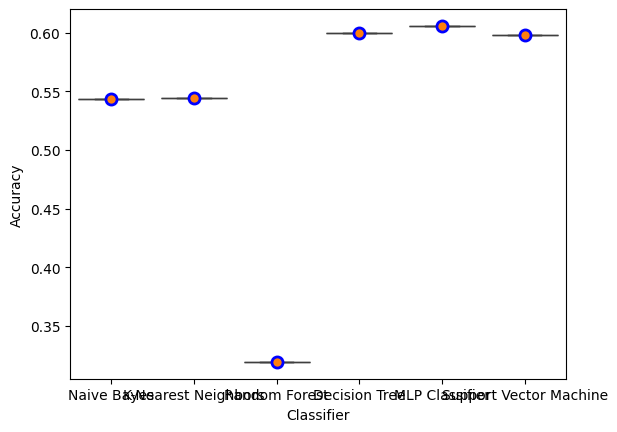

In [26]:

sns.boxplot(x='Classifier', y='Accuracy', data=results_df)
sns.stripplot(x='Classifier', y='Accuracy', data=results_df, size=8, jitter=True, edgecolor="blue", linewidth=2)
plt.show()

In [27]:

joblib.dump(models, 'trained_models.pkl')
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [28]:

def predict_service(model, year):
    
    input_df = pd.DataFrame({'Model': [model], 'Year': [year]})
    input_df = input_df.astype(str)
    input_encoded = encoder.transform(input_df)
  
    input_encoded_df = pd.DataFrame(input_encoded.toarray(), columns=encoder.get_feature_names_out(input_df.columns))
  
    models = joblib.load('trained_models.pkl')
    

    predictions = {}
    for name, model in models.items():
        prediction = model.predict(input_encoded_df)
        predictions[name] = prediction[0]
    
    return predictions